In [2]:
import pandas as pd
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split # Newer versions
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt
import random
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import time
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import pickle
import scipy.sparse
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier



# mute warning that assign columns on dataframe   eg,  df["col1"] = df["col11"]
pd.options.mode.chained_assignment = None  # default='warn'



# Store Original data
whole_data = pd.read_csv(r"data/recipe_train.csv", index_col = False, delimiter = ',', header=0)

## Read Files 

In [2]:
# Store Original data
whole_data = pd.read_csv(r"data/recipe_train.csv", index_col = False, delimiter = ',', header=0)



# Split into attributes and class
y_df = whole_data["duration_label"]    #class df
x_df = whole_data.drop(['duration_label'], axis=1)    # features df

# train test split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.33, random_state = 123)
print('X_train: {} X_test: {}'.format(X_train.shape, X_test.shape))

X_train: (26800, 5) X_test: (13200, 5)


In [3]:
# Small test Data
# random sample part of data for plotting use
sample_data = whole_data.sample(1000)
# Split into attributes and class
sample_y_df = sample_data["duration_label"]    #class df
sample_x_df = sample_data.drop(['duration_label'], axis=1)    # features df

# train test split
sample_X_train, sample_X_test, sample_y_train, sample_y_test = train_test_split(sample_x_df, sample_y_df, test_size = 0.33, random_state = 123)
print('X_train: {} X_test: {}'.format(sample_X_train.shape, sample_X_test.shape))

X_train: (670, 5) X_test: (330, 5)


### Explore the relations between n_steps, n_ingredients  with Cooking Time

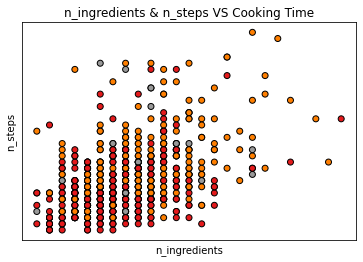

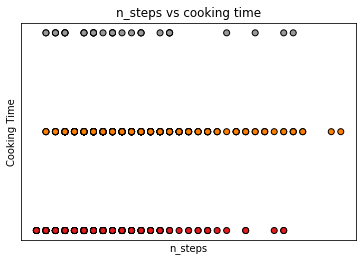

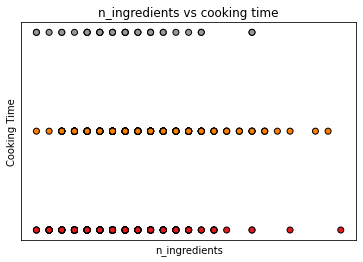

In [4]:
## Only Using n_steps and n_ingredients

# use random sample instead of full size to generate better graph
sample_X_train = sample_X_train.loc[:,["n_ingredients", "n_steps"]]

# Plot the training points
plt.scatter(sample_X_train["n_ingredients"], sample_X_train["n_steps"], c = sample_y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('n_ingredients')
plt.ylabel('n_steps')
plt.xticks(())
plt.yticks(())
plt.title("n_ingredients & n_steps VS Cooking Time")
plt.show()

plt.scatter(sample_X_train["n_steps"], sample_y_train, c = sample_y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('n_steps')
plt.ylabel('Cooking Time')
plt.xticks(())
plt.yticks(())
plt.title("n_steps vs cooking time")
plt.show()

plt.scatter(sample_X_train["n_ingredients"], sample_y_train, c = sample_y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('n_ingredients')
plt.ylabel('Cooking Time')
plt.xticks(())
plt.yticks(())
plt.title("n_ingredients vs cooking time")
plt.show()



As graph shown above, simply using n_ingredients and n_steps cannot do the classification,
for the reason that the numbers of steps / ingredients cannot form clear clusters to classify cooking time

## Only use n_steps and n_ingredients to do prediction

In [5]:
X_train = X_train[["n_steps", "n_ingredients"]]
X_train.head(3)
X_test = X_test[["n_steps", "n_ingredients"]]
X_test.head(3)

,n_steps,n_ingredients
32566,4,6
28547,10,15
6456,8,13


In [6]:
# From workshop 06, using SVM with linear SVM and cubic SVM to do the classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#print(cross_val_score(zero_r, X, y, cv=10))
X = X_train
y = y_train

#try to change C to 1000 or 0.001
C = 1.0  # SVM regularization parameter

models = [DecisionTreeClassifier(max_depth=1),
          KNeighborsClassifier(n_neighbors=1),
          KNeighborsClassifier(n_neighbors=5),
          DecisionTreeClassifier(max_depth=50),
          svm.LinearSVC(C=C, max_iter = 200),]
          #svm.SVC(kernel='rbf', gamma=0.7, C=C)]

titles = ['1-R',
          '1-Nearest Neighbour',
          '5-Nearest Neighbour',
          'Decision Tree',
          'LinearSVC',]
          #'SVM with a cubic kernel']

title_training_acc = {}
for title, model in zip(titles, models):
    model.fit(X, y)
    title_training_acc[title] = model.score(X,y)

title_crossvalidation_acc = {}
for title, model in zip(titles, models):
    title_crossvalidation_acc[title] = cross_val_score(model, X, y, cv = 10).mean()

for title in titles:
    print(title, ': Training Acc', title_training_acc[title], '; X-Val Acc', title_crossvalidation_acc[title])
    

E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
E:\An

1-R : Training Acc 0.6235074626865672 ; X-Val Acc 0.62294776119403
1-Nearest Neighbour : Training Acc 0.5448507462686567 ; X-Val Acc 0.5225373134328358
5-Nearest Neighbour : Training Acc 0.6070149253731343 ; X-Val Acc 0.5878731343283582
Decision Tree : Training Acc 0.6463059701492537 ; X-Val Acc 0.6320149253731343
LinearSVC : Training Acc 0.6169402985074627 ; X-Val Acc 0.5940298507462687


E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Overall, we found that the SVM method using only n_steps and n_ingredients doesn't perform well, as the result is close to 0-R baseline

## Using Stacking Classifier

code from workshop 08

- 'Zero-R',
- 'Logistic Regression',
- 'Decision Tree',
- 'KNN',
- 'GaussianNB',
- 'Logistic Regression'

In [7]:


classifiers = [DummyClassifier(strategy='most_frequent'),
               
          LogisticRegression(random_state=10),
          DecisionTreeClassifier(random_state=10),
          KNeighborsClassifier(),
          GaussianNB(),
        LogisticRegression(random_state=10)]
titles = ['Zero-R',
          'Logistic Regression',
          'Decision Tree',
          'KNN',
          'GaussianNB',
          'Logistic Regression']

meta_classifier = LogisticRegression()
stacker = StackingClassifier(classifiers, meta_classifier)
    

In [8]:
# Do prediction using stacking
for title, model in zip(titles, models):
    model.fit(X_train,y_train)
    start = time.time()
    acc = model.score(X_test, y_test)
    end = time.time()
    t = end-start
    print(title, "Accuracy:",acc, 'Time:', t)
stacker.fit(X_train, y_train)
print("\n\nTotal Performance:")
print('\nStacker Accuracy:', stacker.score(X_test, y_test))

Zero-R Accuracy: 0.6178787878787879 Time: 0.002001523971557617
Logistic Regression Accuracy: 0.5327272727272727 Time: 0.23105239868164062
Decision Tree Accuracy: 0.5956818181818182 Time: 0.21904969215393066
KNN Accuracy: 0.6304545454545455 Time: 0.0030007362365722656


E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GaussianNB Accuracy: 0.2642424242424242 Time: 0.002000093460083008


Total Performance:

Stacker Accuracy: 0.6288636363636364


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Overall, using specific n_steps and n_ingredients may not be good enough

# Neural Net Work Part
# ----------------------------------------------
### Load Vectorized Data and Use Neural Network

## Select k Best features for classification

### Combining 
1. Standarlise
2. TOP K feature selection
3. fit to Neural Network

## 1.1 doc2vec Combining step, ingredients using df Concatenate

In [9]:
import pandas as pd
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split # Newer versions
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt
import random
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import time
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


# mute warning that assign columns on dataframe   eg,  df["col1"] = df["col11"]
pd.options.mode.chained_assignment = None  # default='warn'

In [10]:
# Read Data
# Store Original data
whole_data = pd.read_csv(r"data/recipe_train.csv", index_col = False, delimiter = ',', header=0)

# for each one
step = pd.read_csv(r"data/train_steps_doc2vec50.csv",header=None ,index_col = False, delimiter = ',')
step_df = pd.DataFrame(step)
ingr = pd.read_csv(r"data/train_ingr_doc2vec50.csv",header=None ,index_col = False, delimiter = ',')
ingr_df = pd.DataFrame(ingr)
name = pd.read_csv(r"data/train_name_doc2vec50.csv",header=None ,index_col = False, delimiter = ',')
name_df = pd.DataFrame(name)

# Combining Dataframes
combined_df = pd.concat([step_df,ingr_df,name_df], axis=1)
#combined_df


In [11]:
#Doing classification
X_train = combined_df
y_train = whole_data["duration_label"]

# 1. Standarlise
scaler = StandardScaler()

# 2. Feature Selection (selecting best vectorlised words we can use)
mi = SelectKBest(mutual_info_classif,k=30)  # top k good features

# 3. NN Model
clf = MLPClassifier(max_iter=2000)

# Combining 1,2,3 into pipline
pipeline = Pipeline([('transformer', scaler),('select k best feature', mi), ('estimator', clf)])


# Get Result
print('corss-val noncheating standardised features acc:', np.mean(cross_val_score(pipeline, X_train, y_train, cv=5)))

corss-val noncheating standardised features acc: 0.6621249999999999


As mentioned above, combining steps, ingridients, name matrix and find best 30 features using mutual information

## 1.2 doc2vec Combining step, ingredients, n_steps, n_ingredients using df Concatenate

In [12]:
# Store Original data
whole_data = pd.read_csv(r"data/recipe_train.csv", index_col = False, delimiter = ',', header=0)

# Read Data
#vocab = pickle.load(open("train_name_countvectorizer.pkl", "rb"))
step = pd.read_csv(r"data/train_steps_doc2vec50.csv",header=None ,index_col = False, delimiter = ',')
step_df = pd.DataFrame(step)
ingr = pd.read_csv(r"data/train_ingr_doc2vec50.csv",header=None ,index_col = False, delimiter = ',')
ingr_df = pd.DataFrame(ingr)
name = pd.read_csv(r"data/train_name_doc2vec50.csv",header=None ,index_col = False, delimiter = ',')
name_df = pd.DataFrame(name)
nstep = whole_data["n_steps"]
ningr = whole_data["n_ingredients"]

# Combining Dataframes
combined_df = pd.concat([nstep,ningr,step_df,ingr_df,name_df], axis=1)

In [13]:
#Doing classification
X_train = combined_df.iloc[0:1000,]

y_train = whole_data["duration_label"].iloc[0:1000,]

## 1. Standarlise
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# 2. Feature Selection (selecting best vectorlised words we can use)
mi = SelectKBest(mutual_info_classif,k=150)  # top k good features
X_train = mi.fit_transform(X_train,y_train)

#X_test_x2 = x2.transform(X_test)
# 3. NN Model
clf = MLPClassifier(max_iter=2000,random_state=2)




# Get Result
print('corss-val noncheating standardised features acc:', np.mean(cross_val_score(clf, X_train, y_train, cv=5)))

corss-val noncheating standardised features acc: 0.6260000000000001


### 1.3 Find if StandardScaler() will make a difference to our model 

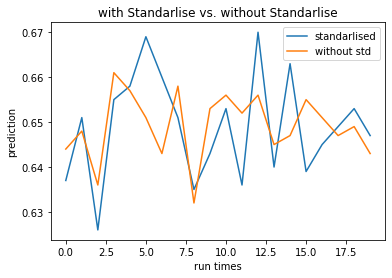

Accuracy with Standarlised model: 0.649
Accuracy without Standarlised model: 0.6492000000000001


In [14]:
## Find if using StandardScaler() will make a difference to our model 

# Store different scores for using StandardScaler() and not
score_std=[]
score_without_std=[]

# iterate through different random state using StandardScaler()
for i in range(0,20):
    X_train = combined_df.iloc[0:1000,]
    y_train = whole_data["duration_label"].iloc[0:1000,]

    ## 1. Standarlise
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    # 2. Feature Selection (selecting best vectorlised words we can use)
    mi = SelectKBest(mutual_info_classif,k=150)  # top k good features
    X_train = mi.fit_transform(X_train,y_train)
    # 3. NN Model
    clf = MLPClassifier(max_iter=2000,random_state=i)
    # Get Result
    score_std.append(np.mean(cross_val_score(clf, X_train, y_train, cv=5)))
    
# iterate through different random state without using StandardScaler()
for i in range(0,20):
    X_train = combined_df.iloc[0:1000,]
    y_train = whole_data["duration_label"].iloc[0:1000,]

    ## 1. Standarlise
    scaler = StandardScaler()
    # 2. Feature Selection (selecting best vectorlised words we can use)
    mi = SelectKBest(mutual_info_classif,k=150)  # top k good features
    X_train = mi.fit_transform(X_train,y_train)
    # 3. NN Model
    clf = MLPClassifier(max_iter=2000,random_state=i)
    # Get Result
    score_without_std.append(np.mean(cross_val_score(clf, X_train, y_train, cv=5)))
    
    
plt.plot(range(len(score_std)), score_std, label='standarlised')
plt.plot(range(len(score_without_std)), score_without_std, label='without std')
plt.title('with Standarlise vs. without Standarlise')
plt.ylabel('prediction')
plt.xlabel('run times')
plt.legend()
plt.show()
print("Accuracy with Standarlised model:", np.mean(score_std))
print("Accuracy without Standarlised model:", np.mean(score_without_std))

As plot shown above, using standarlised scaler doesn't affect much accuracy for our model, as the steps, ingredients are already standarlised and the standarlisation of n_steps and n_ingr doesn't affect the overall performance

# 





# Run From HERE


# 





## Preprocessing

### 2.1 countVec Combining step, ingredients using sparce matrix Concatenate


#### 2.1.1 Select top 4000 features from ingredients, steps separately, THEN combing them into dataframe for Train and Test

Since The feature Selection process calculates independence, so select for each attribute and combine them together = select for a big data set

In [7]:
##### Load Test Data

whole_test_data = pd.read_csv(r"data/test/recipe_test.csv", index_col = False, delimiter = ',', header=0)
# Read Data and convert to dataframe
test_step = scipy.sparse.load_npz(r"data/test/test_steps_vec.npz")
# ingr data
test_ingr = scipy.sparse.load_npz(r"data/test/test_ingr_vec.npz")
# name data
test_name = scipy.sparse.load_npz(r"data/test/test_name_vec.npz")

##### Load Train Data
# Store Original data
whole_data = pd.read_csv(r"data/recipe_train.csv", index_col = False, delimiter = ',', header=0)
y_train = whole_data["duration_label"]

##### Use MI To PreProcess the Data

# Feature Selection to reduce size
mi_pre = SelectKBest(mutual_info_classif,k=2500)  # top k good features

# Read Data and convert to dataframe
step = scipy.sparse.load_npz("data/train_steps_vec.npz")
step = mi_pre.fit_transform(step,y_train)   # Feature Selection to reduce size
test_step = mi_pre.transform(test_step)

# ingr data
ingr_selector = SelectKBest(mutual_info_classif,k=2500)
ingr = scipy.sparse.load_npz("data/train_ingr_vec.npz")
ingr = ingr_selector.fit_transform(ingr,y_train)   # Feature Selection to reduce size
test_ingr = ingr_selector.transform(test_ingr)

# name data
name = scipy.sparse.load_npz("data/train_name_vec.npz")
name = mi_pre.fit_transform(name,y_train)   # Feature Selection to reduce size
test_name = mi_pre.transform(test_name)


## GET COMBINED DATA

# Combining TRAINING Dataframes
nstep = whole_data["n_steps"]
ningr = whole_data["n_ingredients"]
combined_matrix = hstack((step, ingr, name))
combined_vec_df = pd.DataFrame.sparse.from_spmatrix(combined_matrix, index=None, columns=None)
combined_df = pd.concat([nstep,ningr,combined_vec_df], axis=1)

# Combining TEST Dataframes
test_nstep = whole_test_data["n_steps"]
test_ningr = whole_test_data["n_ingredients"]
test_combined_matrix = hstack((test_step, test_ingr, test_name))
test_combined_vec_df = pd.DataFrame.sparse.from_spmatrix(test_combined_matrix, index=None, columns=None)
test_combined = pd.concat([test_nstep,test_ningr,test_combined_vec_df], axis=1)

In [8]:
# Save Data To disk
## dump combined df and test_combined_df into disk:
pickle.dump(combined_df, open('./model/train_combined_df_small.sav', 'wb'))
pickle.dump(test_combined, open('./model/test_combined_df_small.sav', 'wb'))


## Method1: DEEP LEARNING ONLY

#### 2.1.2 Using Combined Dataframe (n_steps, n_ingrs, steps, ingrs), use grid search to find optimum parameters
1. choose optimal top k features
2. reduce the size of the model by using top k features
3. use grid search to find best parameters for NN algorithm

#### 2.1.3 Using Grid Search to Find Optimal Parameters
Code from Practical-11-2021





### Training

In [3]:


#Doing classification
#X_train = combined_df
X_train = pickle.load(open('./model/train_combined_df_small.sav', 'rb'))
y_train = whole_data["duration_label"]

## 1. Standarlise
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)




# 2. #####  Feature Selection (selecting best vectorlised words we can use)
# No need to do Feature Selection as it's completed in preprocessing steps




# 3. #####  NN Classification (selecting best vectorlised words we can use)

clf = MLPClassifier(max_iter=2000)

##  GRID SEARCH
# without grid search tuning
clf.fit(X_train, y_train)
print('MLP acc without tuning:', clf.score(X_train, y_train))
#arguments of MLPClassifier and a list of values for them to search and find the best.
alphas = [np.power(10.0, i) for i in range(-7, 2)]
hidden_sizes = [[100], [10, 10], [100,50,50,10]]
param_grid = {'alpha': alphas, 'hidden_layer_sizes':hidden_sizes}

# Do Grid Search
gs = GridSearchCV(estimator=clf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3,
                  n_jobs=-1,
                  verbose=1)
gs.fit(X_train, y_train)

# Print best_params
best_params = gs.best_params_
print('best_params', best_params)

# Do Neural Network with best parameters
clf = MLPClassifier(max_iter=2000, **best_params)
clf.fit(X_train, y_train)

# if current score is higher than previous K's score, store this model's index
cur_score = clf.score(X_train, y_train)
print('acc with best params:', cur_score)
print('\n\n\n')

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


MLP acc without tuning: 0.999975
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 75.3min finished
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


best_params {'alpha': 1.0, 'hidden_layer_sizes': [100]}


E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


NameError: name 'X_train_test' is not defined

In [6]:
print(clf.score(X_train, y_train))

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.86315



### Dump Data to Disk:

1. Trained Mi Feature Selection Model
2. Trained NN Model
3. Combined Train dataframe 
3. Combined Test Model 
    - ( Using 3 small vecorised matrix (name, ingr, steps), selecting 4000 features from each of them and combined them to a 10908 attributes dataframe for test and training data) 


In [7]:
#1.
# # dump nn model into disk
pickle.dump(clf, open('./model/nn_model_2000.sav', 'wb'))

# some time later...
 
# load the model from disk
# loaded_model = pickle.load(open(mi_file_name, 'rb'))

In [8]:
#2.
# # dump mi feature selection model into disk
pickle.dump(mi, open('./model/top_2000_mi_model.sav', 'wb'))

NameError: name 'mi' is not defined

## Testing
Load Data and Do Predicting

In [10]:
# Load Preprocessed Test Data:
X_test = pickle.load(open('./model/test_combined_df_small.sav', 'rb'))

# Select which model and mi selector we wanna use
model = pickle.load(open('./model/nn_model_2000.sav', 'rb'))
#mi_test = pickle.load(open('./model/top_2000_mi_model.sav', 'rb'))

# Select k best features using above mi
#X_test = mi_test.transform(X_test)

#Use Model to Test Data
result = model.predict(X_test)

# Output To CSV
out=pd.DataFrame(result)
out.index.name='id'
out.index += 1
out.to_csv('./output/predict_label.csv',header = ['duration_label'])

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## Reflects:

### The Result Showing below displays different K value and its score, it appears that higher K value gives better results

### 1st First Attempt
 K value for Each Attribute: 500
 , Combined Feature Num: 500*3 = 1500 attributes

- Combined Feature Selection K value: 20
- MLP acc without tuning: 0.7727
- best_params {'alpha': 0.1, 'hidden_layer_sizes': [100]}
- acc with best params: 0.76615



- K value(Selectbest features):  60
- MLP acc without tuning: 0.8501
- best_params {'alpha': 0.001, 'hidden_layer_sizes': [10, 10]}
- acc with best params: 0.800925


- K value(Selectbest features):  100
- MLP acc without tuning: 0.91745
- best_params {'alpha': 1.0, 'hidden_layer_sizes': [80, 50, 20]}
- acc with best params: 0.816525
- Test Accuracy: 0.80266  



- K value(Selectbest features):  140
- MLP acc without tuning: 0.95355
- best_params {'alpha': 1.0, 'hidden_layer_sizes': [100]}
- acc with best params: 0.806175



- K value(Selectbest features):  180
- MLP acc without tuning: 0.982475
- best_params {'alpha': 1.0, 'hidden_layer_sizes': [100]}
- acc with best params: 0.811525

### 2nd Second Attempt
##### After finding that the larger k value may lead to better result, this time, starts from higher k value
##### Although Higher K gets a 1.0 accuracy, it may lead to overfitting, so trying to test with test data

K value for Initialize: 2000, Combined K value: 2000*3 = 6000 attributes

- K value(Selectbest features):  1500
- Index value (i):  0    (Use this index to get models from list)
- MLP acc without tuning: 1.0
- best_params {'alpha': 1.0, 'hidden_layer_sizes': [100]}
- acc with best params: 0.830475
- Test Accuracy: 0.81333  



- K value(Selectbest features):  1200
- Index value (i):  1    (Use this index to get models from list)
- MLP acc without tuning: 0.999925
- best_params {'alpha': 1.0, 'hidden_layer_sizes': [100]}
- acc with best params: 0.829225
- Test Accuracy: 0.80833  




- K value(Selectbest features):  900
- Index value (i):  2    (Use this index to get models from list)
- MLP acc without tuning: 0.996875

### 3rd Third Attempt
- At this Stage, Try Using Larger K as Larger K provides better results
- K value for Each Attribute: 5000, 
- Combined Feature Num: 5000+5000+2906 = 12906 attributes
- Combined Feature Selection:  Without Feature Selection

- MLP acc without tuning: 1.0
- Test Accuracy: 0.78 (Worst)
##### This Attempt,  by using raw data to fit the MLP classifer with 12906 attributes, the classifer may be overfitting and resulting a lower accuracy


### 4th Fourth Attempt
- At this Stage, Try Using Larger K as Larger K provides better results
- K value for Each Attribute: 4000, 
- Combined Feature Num: 4000+4000+2906 = 10906 attributes
- Combined Feature Selection:  Select Top 5000 Attributes

- MLP acc without tuning: 1.0
- best_params {'alpha': 1.0, 'hidden_layer_sizes': [100]}
- acc with best params: 0.8524
- Test Accuracy: 0.81400     (Best)
- Trained for 3 hours

-- without feature selection in combined df:
- Test Accuracy: 0.80566


### 5th Fifth Attempt
- K value for Each Attribute: 2100
- Combined Feature Selection: No Feature Selection 
- MLP acc without tuning: 0.999975
- best_params {'alpha': 1.0, 'hidden_layer_sizes': [100]}
- acc with best params: 0.86315
- Test Accuracy: 0.80966
- 1.5 hours training

## Diag Plot

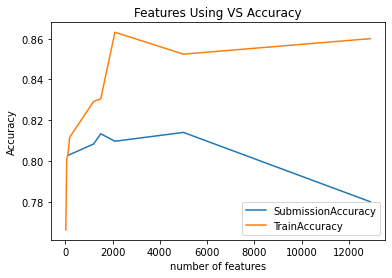

In [23]:
# For Submission Test Accuracy
x = [100, 1200, 1500, 2100, 5000, 12906]
y = [0.80266, 0.80833, 0.81333, 0.80966, 0.81400, 0.78]

# For Self Test Accuracy
x2 = [20, 60, 100, 140, 180, 1200, 1500, 2100, 5000, 12906]
y2 = [0.76615, 0.800925, 0.80266, 0.806175, 0.811525, 0.829225, 0.830475, 0.86315, 0.8524, 0.86]

plt.plot(x, y, label='SubmissionAccuracy')
plt.plot(x2, y2, label='TrainAccuracy')
plt.title('Features Using VS Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('number of features')
plt.legend()
plt.show()

# Method 2: Stacking With NN


- Use Stacking Algorithm combining Neural Networks 

1. Neural Network as NN, Explored through previous 4th attempt

#### Training

In [11]:
start_time = time.time()

# Load Data
X_train = pickle.load(open('./model/train_combined_df_small.sav', 'rb'))
y_train = whole_data["duration_label"]


## Stacking Algorithms
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=10)),
    ('NN',  MLPClassifier(max_iter=2000, alpha=1.0, hidden_layer_sizes=[100], random_state=10)),
]

# Build Stacking Model
stack_model = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv = 3,
    n_jobs = -1,
)


# Fit the model
stack_model.fit(X_train, y_train)

# get Score
print("--- Running time: %s seconds ---" % (time.time() - start_time))
print("Stacking Score: ",stack_model.score(X_train, y_train))

--- Running time: 682.3536102771759 seconds ---


E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Stacking Score:  0.925325


Since We are predicting the testing data without labels(unsupervised). Therefore we are using scoring function with X_train and y_train. The Optimal accuracy result should be closer to 1 but may not equal to one to prevent overfitting issues

### Dump Model to Disk

In [12]:
#2.
# # dump mi feature selection model into disk
pickle.dump(stack_model, open('./model/stacking_model_selectfeature_small.sav', 'wb'))

#### Testing

In [14]:
# Load Preprocessed Test Data:
X_test = pickle.load(open('./model/test_combined_df_small.sav', 'rb'))

# Select which model and mi selector we wanna use
model = pickle.load(open('./model/stacking_model_selectfeature_small.sav', 'rb'))

#Use Model to Test Data
result = model.predict(X_test)

# Output To CSV
out=pd.DataFrame(result)
out.index.name='id'
out.index += 1
out.to_csv('./output/predict_label_stacking.csv',header = ['duration_label'])

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


### Reflection

### First Attempt
- 10892 Features Using 
1. Random Forest
2. Decision Tree
3. Neural Network
- Stacking Score:  0.966875
- Test Score: 0.80533

### Second Attempt
- 5000 Features Using 
1. Random Forest
2. Decision Tree
3. Neural Network
- Stacking Score:  0.966875
- Test Score 0.81300

##### Since Our Mode is overfitting, reduce top k features and remove the decision tree classifier 

#### It's worth noting that when number of features are fixed(k value), stacking with random forest/decision tree/NN  performs worse than single NN

### Third Attempt


## Find Best K value Using Loop

In [33]:

Test_Accuracy = []
Train_Accuracy=[]

##### Load Test Data


# Read Data and convert to dataframe

##### Load Train Data
# Store Original data
whole_data = pd.read_csv(r"data/recipe_train.csv", index_col = False, delimiter = ',', header=0)

# Iterate Through K value and get data score
k=1000
k_list = []
while k < 10000:

    ##### Use MI To PreProcess the Data
    # Feature Selection to reduce size
    mi_pre = SelectKBest(mutual_info_classif,k=k)  # top k good features

    # Read Data and convert to dataframe
    step = scipy.sparse.load_npz("data/train_steps_vec.npz")
    step = mi_pre.fit_transform(step,y_train)   # Feature Selection to reduce size

    # ingr data
    # if k is greater than column space
    if k >= ingr.shape[1]:
        ingr_k = "all"
    else:
        ingr_ = k
    ingr_selector = SelectKBest(mutual_info_classif,k=ingr_)
    ingr = scipy.sparse.load_npz("data/train_ingr_vec.npz")
    ingr = ingr_selector.fit_transform(ingr,y_train)   # Feature Selection to reduce size

    # name data
    name = scipy.sparse.load_npz("data/train_name_vec.npz")
    name = mi_pre.fit_transform(name,y_train)   # Feature Selection to reduce size


    ## GET COMBINED DATA

    # Combining TRAINING Dataframes
    nstep = whole_data["n_steps"]
    ningr = whole_data["n_ingredients"]
    combined_matrix = hstack((step, ingr, name))
    combined_vec_df = pd.DataFrame.sparse.from_spmatrix(combined_matrix, index=None, columns=None)
    combined_df = pd.concat([nstep,ningr,combined_vec_df], axis=1)

    X_train = combined_df
    y_train = whole_data["duration_label"]
    
    # 3. #####  NN Classification (selecting best vectorlised words we can use)

    clf = MLPClassifier(max_iter=2000, early_stopping = True)

    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    Train_Accuracy.append(train_score)
    print('MLP acc Train:', train_score)


    test_score = np.mean(cross_val_score(clf, X_train, y_train, cv=3))
    Test_Accuracy.append(test_score)
    print('MLP acc Cross_val:', test_score)
    k_list.append(k)
    k += 1500





E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


MLP acc Train: 0.791875


E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


MLP acc Cross_val: 0.775575036593554


E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


# 
# Bibliograhy:
# 

Generating Personalized Recipes from Historical User Preferences. Bodhisattwa Prasad Majumder,
Shuyang Li, Jianmo Ni, Julian McAule+y, in Proceedings of the 2019 Conference on Empirical
Methods in Natural Language Processing and the 9th International Joint Conference on Natural
Language Processing (EMNLP-IJCNLP), 2019.